In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import nltk
import re
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Ml/spam.tsv",sep='\t')
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
data.shape

(5572, 4)

In [5]:
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
data['label'].value_counts()
data.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
spam=data[data['label']=='spam']
spam.head(5)
spam.shape
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [9]:
ham=data[data['label']=='ham']
ham.head(5)
ham.shape
ham=ham.sample(spam.shape[0])

In [10]:
new=ham.append(spam,ignore_index=True)
new

<ipython-input-10-4e149e2aeebb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new=ham.append(spam,ignore_index=True)


,label,message,length,punct
0,ham,I asked you to call him now ok,30,0
1,ham,Am on a train back from northampton so i'm afr...,175,6
2,ham,Ok set let u noe e details later...,35,3
3,ham,.Please charge my mobile when you get up in mo...,52,2
4,ham,As per your request 'Maangalyam (Alaipayuthe)'...,136,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [11]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'https?://\S+', '', text) 
    text= re.sub('<.*?>','',text) 
    text = re.sub(r"#", "", text)
    text=re.sub(r'[\([{})\]]','',text)
    return text

In [12]:
new['message'].apply(preprocess)

0                          i asked you to call him now ok
1       am on a train back from northampton so im afra...
2                        ok set let u noe e details later
3       please charge my mobile when you get up in mor...
4       as per your request maangalyam alaipayuthe has...
                              ...                        
1489    want explicit sex in 30 secs ring 02073162414 ...
1490    asked 3mobile if 0870 chatlines inclu in free ...
1491    had your contract mobile 11 mnths latest motor...
1492    reminder from o2 to get 250 pounds free call c...
1493    this is the 2nd time we have tried 2 contact u...
Name: message, Length: 1494, dtype: object

In [13]:
new['new_message']=new['message'].apply(lambda x:nlp(x))
new.head(5)

,label,message,length,punct,new_message
0,ham,I asked you to call him now ok,30,0,"(I, asked, you, to, call, him, now, ok)"
1,ham,Am on a train back from northampton so i'm afr...,175,6,"(Am, on, a, train, back, from, northampton, so..."
2,ham,Ok set let u noe e details later...,35,3,"(Ok, set, let, u, noe, e, details, later, ...)"
3,ham,.Please charge my mobile when you get up in mo...,52,2,"(.Please, charge, my, mobile, when, you, get, ..."
4,ham,As per your request 'Maangalyam (Alaipayuthe)'...,136,6,"(As, per, your, request, ', Maangalyam, (, Ala..."


In [14]:
def transform(text):
    doc=nlp(text,disable=['parser','ner'])
    lemmas=[token.lemma_ for token in doc]
    a_lemmas=[lemma for lemma in lemmas if lemma.isalpha()]
    return ' '.join(a_lemmas)

In [15]:
new['new_message']=new['new_message'].apply(transform)


In [16]:
X_train, X_test, y_train, y_test =  train_test_split(new['new_message'], new['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [17]:
X_train.shape
del new['message']
new.head(5)

,label,length,punct,new_message
0,ham,30,0,I ask you to call he now ok
1,ham,175,6,be on a train back from northampton so I be af...
2,ham,35,3,ok set let u noe e detail later
3,ham,52,2,charge my mobile when you get up in morning
4,ham,136,6,as per your request Maangalyam Alaipayuthe hav...


In [27]:
classifier1 = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')) , ("classifier", RandomForestClassifier(n_estimators=100,random_state=42))])
classifier2 = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')) , ("bayes", MultinomialNB())])
classifier3 = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')) , ("knn", KNeighborsClassifier())])
classifier4 = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')) , ("svc", SVC())])
classifier5 = Pipeline([("tfidf", TfidfVectorizer(stop_words='english')) , ("GBM", GradientBoostingClassifier())])

In [28]:
classifier1.fit(X_train, y_train)
classifier2.fit(X_train,y_train)
classifier3.fit(X_train,y_train)
classifier4.fit(X_train,y_train)
classifier5.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)

In [29]:
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))
print(accuracy_score(y_test,y_pred4))
print(accuracy_score(y_test,y_pred5))

0.9309576837416481
0.933184855233853
0.6837416481069042
0.9443207126948775
0.8953229398663697


In [30]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



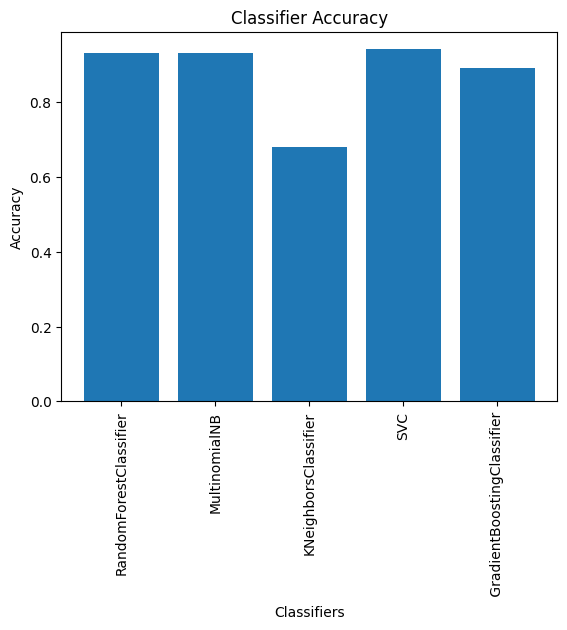

In [34]:
classifiers = ['RandomForestClassifier', 'MultinomialNB', 'KNeighborsClassifier', 'SVC', ' GradientBoostingClassifier']
accuracy = [0.93, 0.93, 0.68, 0.94, 0.89]

plt.bar(classifiers, accuracy)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.xticks(rotation=90)
plt.show()